In [3]:
import sys
sys.path.insert(1, '../../../eispy2d/library/')
import benchmark as bmk
import result as rst
benchmark = bmk.Benchmark(import_filename="average.bmk",
                          import_filepath="../../../data/position/average/")
print(benchmark)

Name: average.bmk
Method: lsm, osm, bim, csi, som, ca
Discretization: Richmond Method (40x40)
Results: done



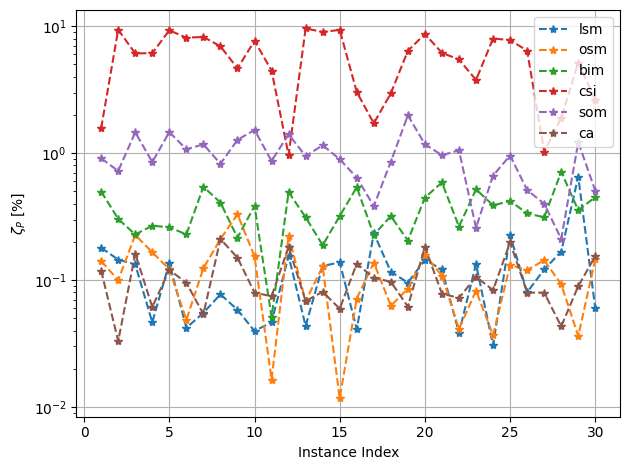

In [7]:
benchmark.plot("zeta_p", show=True, yscale='log')

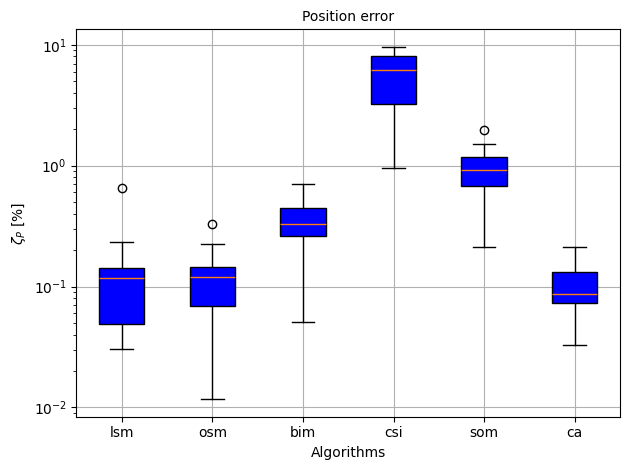

In [9]:
benchmark.boxplot("zeta_p", show=True, yscale='log')

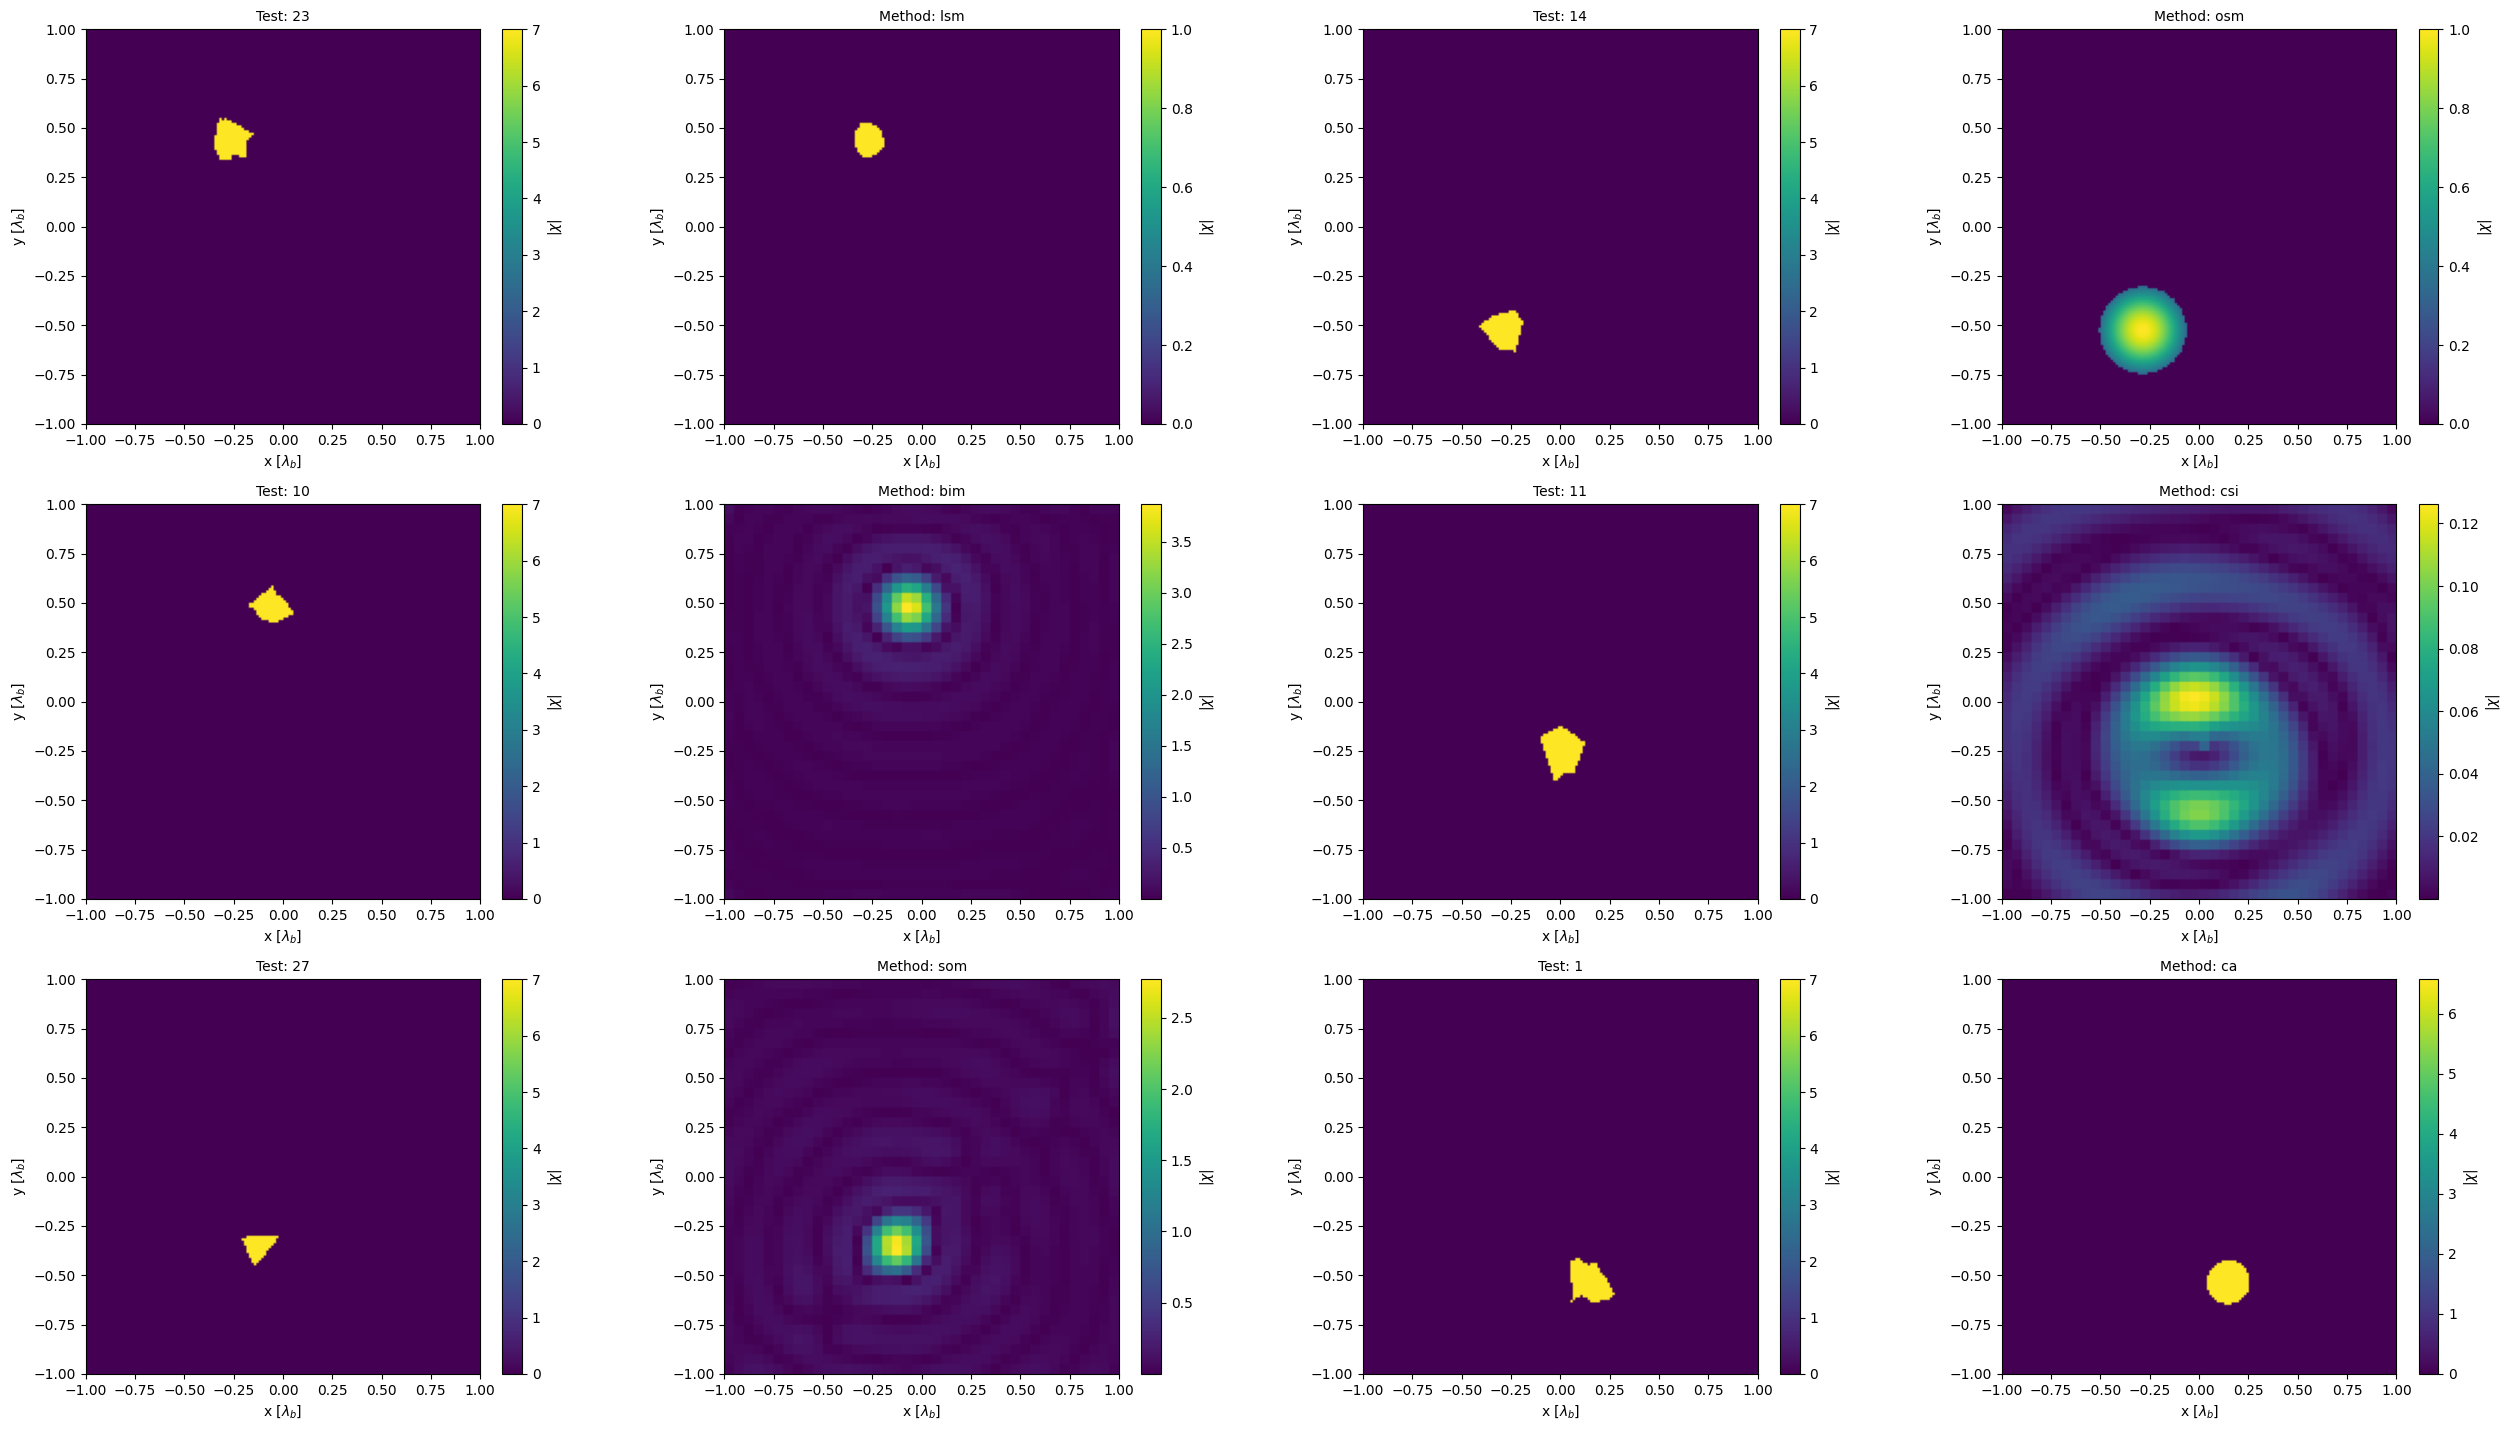

In [10]:
benchmark.reconstruction(indicator="zeta_p", show=True, mode=bmk.BEST_TEST)

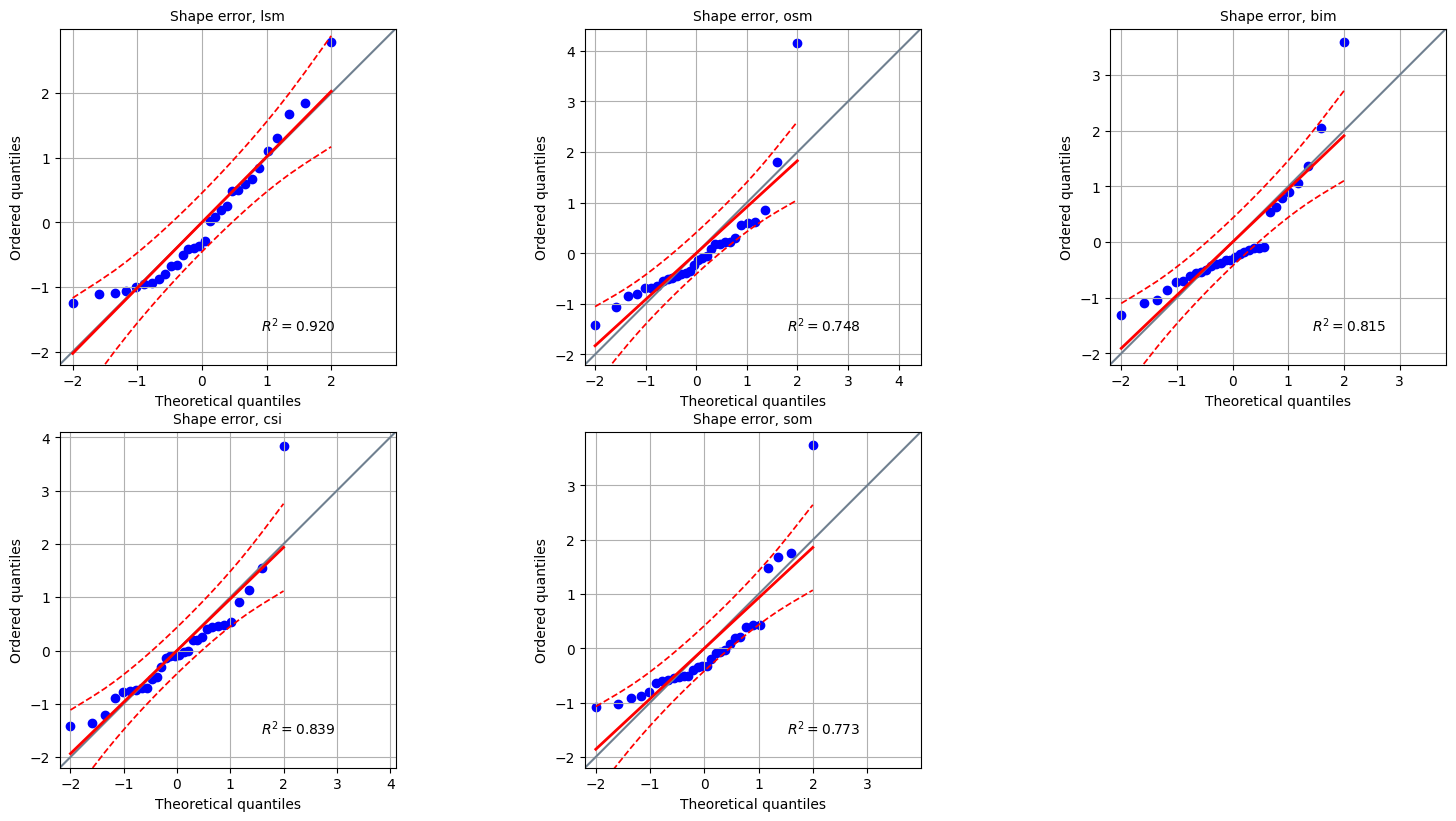

In [5]:
benchmark.normality("zeta_s", show=True)

In [11]:
benchmark.compare("zeta_p", method=["osm","bim", "som", "ca"], all2all=True)

Randomized Complete Block Design
Data: zeta_p of  osm, bim, som, ca (Transformation: log)
Statistic: 124.2001, p-value: 2.435e-31
All-to-all comparison method: Multiple Paired T-Test with Bonferroni correction
* osm = bim, H0: False, p-value: 7.580e-10, Confi. Inter. (-1.63e+00, -8.47e-01)
* osm = som, H0: False, p-value: 4.273e-14, Confi. Inter. (-2.64e+00, -1.73e+00)
* osm = ca, H0: True, p-value: 9.532e-01, Confi. Inter. (-3.49e-01, 3.63e-01)
* bim = som, H0: False, p-value: 5.717e-07, Confi. Inter. (-1.37e+00, -5.28e-01)
* bim = ca, H0: False, p-value: 1.146e-11, Confi. Inter. (9.19e-01, 1.57e+00)
* som = ca, H0: False, p-value: 4.804e-18, Confi. Inter. (1.87e+00, 2.52e+00)



Confidence Intervals
Indicator: zeta_p
* osm-bim, Normality: True, 95.0 Confi. In.: (-3.00e-01, -1.84e-01)
* osm-som, Normality: True, 95.0 Confi. In.: (-9.75e-01, -6.79e-01)
* osm-ca, Normality: True, 95.0 Confi. In.: (-7.92e-03, 3.51e-02)
* bim-som, Normality: True, 95.0 Confi. In.: (-7.62e-01, -4.08e-01)
* bim-ca, Normality: True, 95.0 Confi. In.: (2.02e-01, 3.09e-01)
* som-ca, Normality: True, 95.0 Confi. In.: (6.90e-01, 9.91e-01)



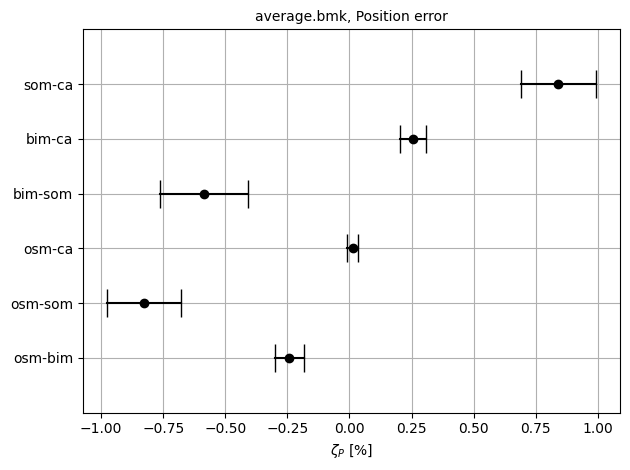

(<Figure size 640x480 with 1 Axes>, None)

In [13]:
benchmark.confint("zeta_p", show=True, paired=True, method=["osm","bim", "som", "ca"])

Confidence Intervals
Indicator: zeta_p
* osm-bim, Normality: True, 95.0 Confi. In.: (-3.00e-01, -1.84e-01)
* osm-som, Normality: True, 95.0 Confi. In.: (-9.75e-01, -6.79e-01)
* osm-ca, Normality: True, 95.0 Confi. In.: (-7.92e-03, 3.51e-02)
* bim-som, Normality: True, 95.0 Confi. In.: (-7.62e-01, -4.08e-01)
* bim-ca, Normality: True, 95.0 Confi. In.: (2.02e-01, 3.09e-01)
* som-ca, Normality: True, 95.0 Confi. In.: (6.90e-01, 9.91e-01)



/var/folders/2s/w3nw72w50v52hnm29spkngvm0000gn/T/ipykernel_74197/1708635472.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


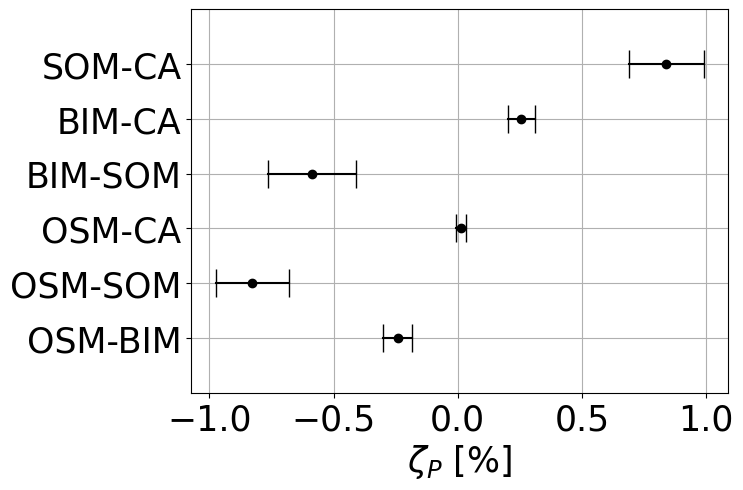

In [14]:
fig, _ = benchmark.confint("zeta_p", show=False, paired=True, method=["osm","bim", "som", "ca"])

# Increase font size to 25 and remove title
for ax in fig.get_axes():
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_xlabel(ax.get_xlabel(), fontsize=25)
    ax.set_ylabel(ax.get_ylabel(), fontsize=25)
    ax.set_title('')  # Remove title
    
    # Set y-axis labels to uppercase
    y_labels = [label.get_text().upper() for label in ax.get_yticklabels()]
    ax.set_yticklabels(y_labels)

fig.show()

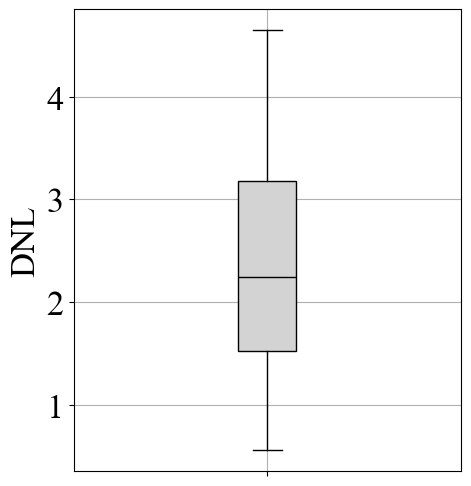

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

dnl = np.zeros(30)
for i in range(30):
    dnl[i] = benchmark.testset.test[i].dnl
plt.figure(figsize=(5, 6))
box_plot = plt.boxplot(dnl, vert=True, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightgray')
box_plot['medians'][0].set_color('black')
plt.ylabel('DNL', fontsize=25)
# plt.title('Boxplot of DNL')
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='x', labelbottom=False)  # Remove x-axis labels
plt.grid(True)
plt.show()